# Importing the libraries

In [18]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import pandas as pd
import harmonize as hz
import seaborn as sns

# Load the data cube and original data to compare

In [19]:
# Create a path to the data directory
path_data = "../data/Raw/"

In [20]:
# Load the data set
ndvi = xr.open_dataset(path_data + 'Raw_NDVI_16D_1km.nc')
lai = xr.open_dataset(path_data + 'Raw_LAI_8D_500m.nc')
evap = xr.open_dataset(path_data + 'Raw_Evap_8D_500m.nc')
era = xr.open_dataset(path_data + 'Raw_weather_4H_9km.nc')
lst_night = xr.open_dataset(path_data + 'Raw_LST_Night_1D_1km.nc')
lst_day = xr.open_dataset(path_data + 'Raw_LST_Day_1D_1km.nc')
active_fire = xr.open_dataset(path_data + 'Raw_ActiveFire_500m.nc')
burn_mask = xr.open_dataset(path_data + 'Raw_BurnMask_1km.nc')
fwi = xr.open_mfdataset(path_data + '/Raw_Fwi/*.nc', combine='by_coords', chunks=None)
density = rxr.open_rasterio(path_data + 'fra_pd_2015_1km_UNadj.tif', masked=True).squeeze()
datacube = xr.open_dataset(path_data + 'datacube.nc', chunks=None, decode_coords="all")

In [21]:
# Select the variables of interest
ndvi_filter = ndvi['_1_km_16_days_EVI']
lai_filter = lai['Fpar_500m']
evap_filter = evap['ET_500m']
era_filter = era[['u10', 'v10', 't2m', 'tp']]
lst_night_filter = lst_night['LST_Night_1km']
lst_day_filter = lst_day['LST_Day_1km']
# fwi_filter = fwi['fwi-daily-proj']
active_fire_filter = active_fire[['First_Day', 'Last_Day', 'Burn_Date']]
burn_mask_filter = burn_mask['FireMask']

# Comparaison of the datacube and the original data

# NDVI

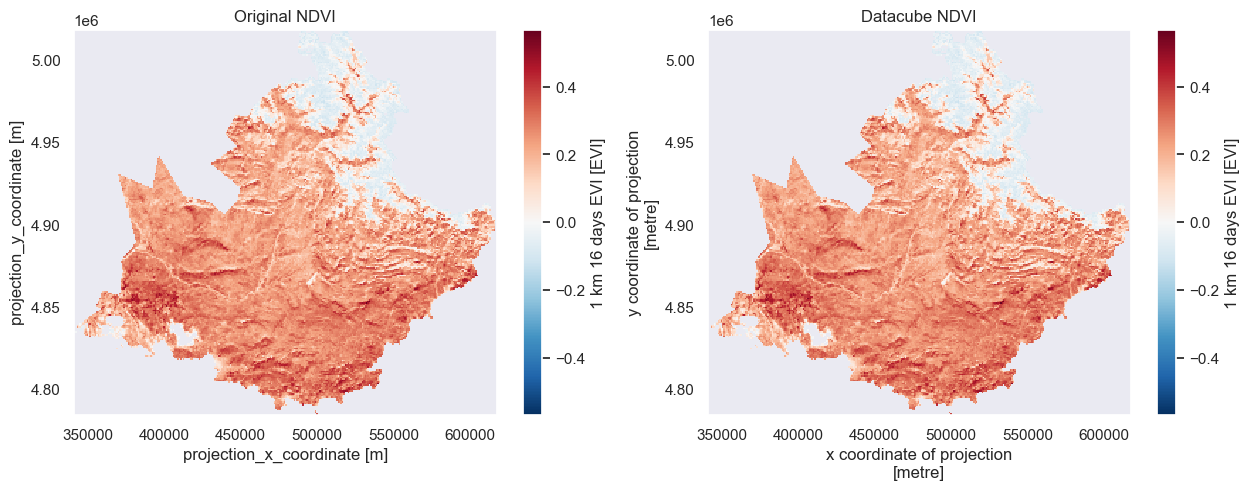

In [22]:
# Plot the EVI from the original dataset and the datacube with seaborn
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ndvi_filter.sel(time='2019-01-01').plot(ax=ax[0])
datacube['_1_km_16_days_EVI'].sel(time='2019-01-01').plot(ax=ax[1])
ax[0].set_title('Original NDVI')
ax[1].set_title('Datacube NDVI')
plt.show()


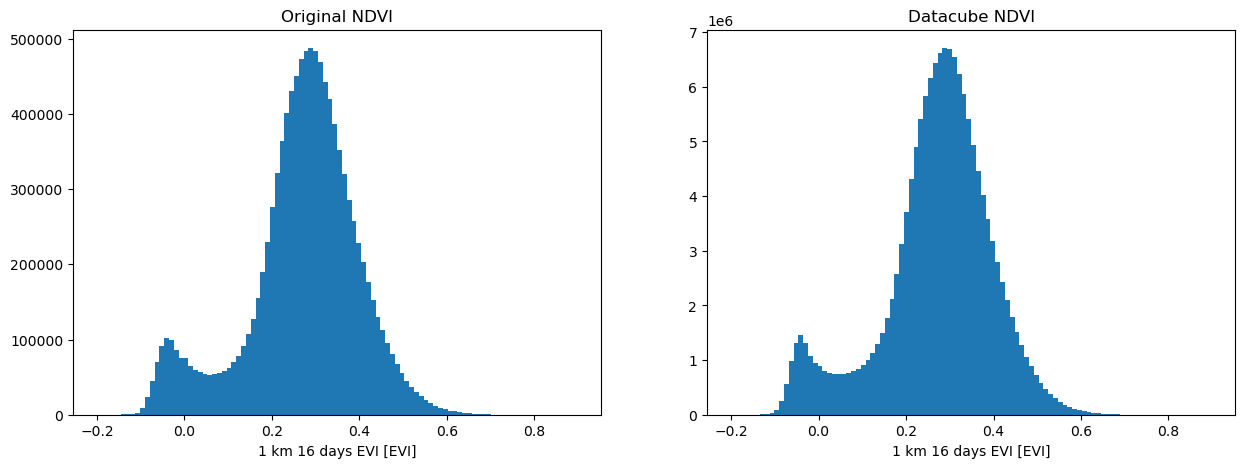

In [8]:
# Plot the EVI distribution from the original dataset and the datacube
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ndvi_filter.plot.hist(ax=ax[0], bins=100)
datacube['_1_km_16_days_EVI'].plot.hist(ax=ax[1], bins=100)
ax[0].set_title('Original NDVI')
ax[1].set_title('Datacube NDVI')
plt.show()

# LAI

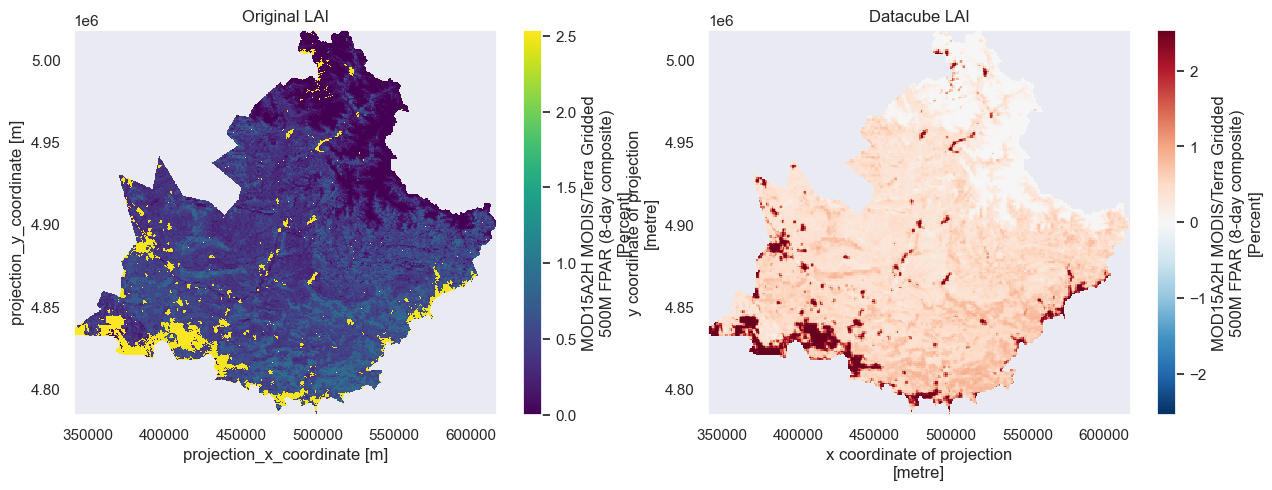

In [23]:
# Plot the Fpar from the original dataset and the datacube with seaborn
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
lai_filter.sel(time='2019-01-01').plot(ax=ax[0])
datacube['Fpar_500m'].sel(time='2019-01-01').plot(ax=ax[1])
ax[0].set_title('Original LAI')
ax[1].set_title('Datacube LAI')
plt.show()


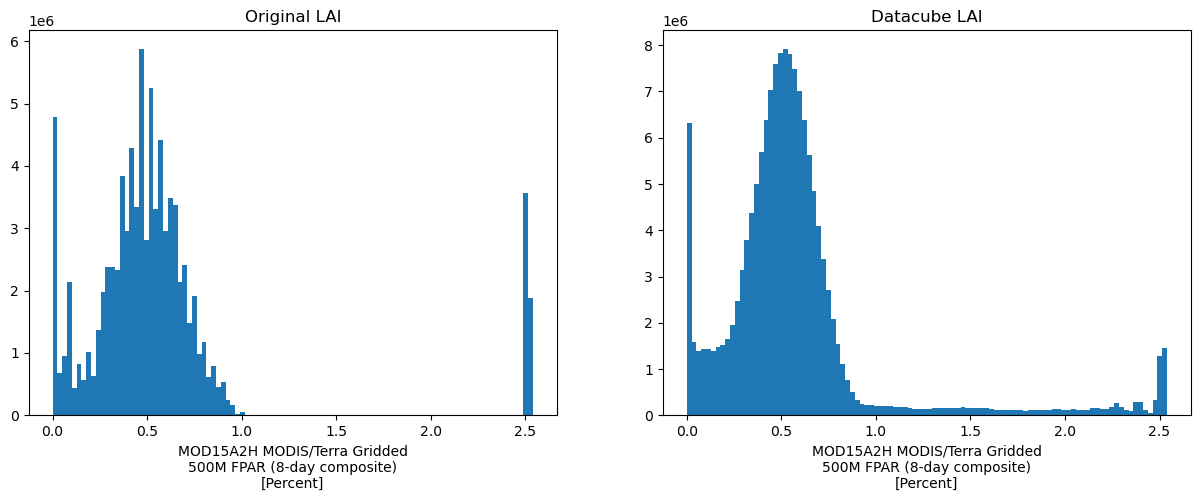

In [10]:
# Plot the Fpar distribution from the original dataset and the datacube
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
lai_filter.plot.hist(ax=ax[0], bins=100)
datacube['Fpar_500m'].plot.hist(ax=ax[1], bins=100)
ax[0].set_title('Original LAI')
ax[1].set_title('Datacube LAI')
plt.show()

In [15]:
# Statistics of the Fpar on the original dataset and the datacube
print('Original LAI')
print(lai_filter.mean().values)
print(lai_filter.std().values)
print(lai_filter.min().values)
print(lai_filter.max().values)
print('-------------------')
print('Datacube LAI')
print(datacube['Fpar_500m'].mean().values)
print(datacube['Fpar_500m'].std().values)
print(datacube['Fpar_500m'].min().values)
print(datacube['Fpar_500m'].max().values)


Original LAI
0.5842182
0.5626097917556763
0.0
2.5399999618530273
n/-------------------/n
Datacube LAI
0.5817183938355989
0.45917675244593
-1.1102230246251565e-16
2.5399999618530273


# Evapotranspiration

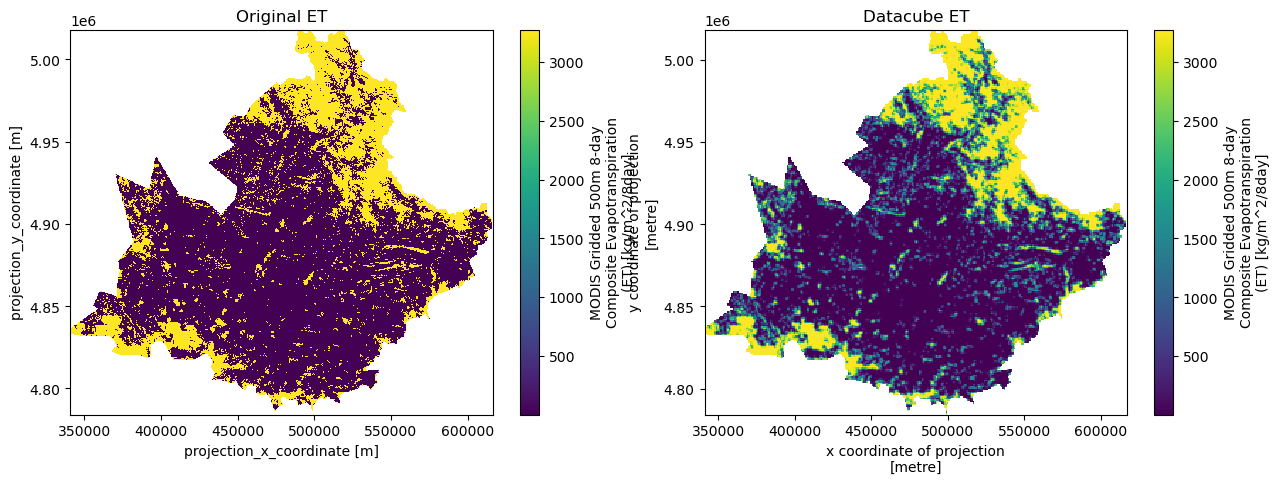

In [16]:
# Plot the ET from the original dataset and the datacube
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
evap_filter.sel(time='2019-01-01').plot(ax=ax[0])
datacube['ET_500m'].sel(time='2019-01-01').plot(ax=ax[1])
ax[0].set_title('Original ET')
ax[1].set_title('Datacube ET')
plt.show()

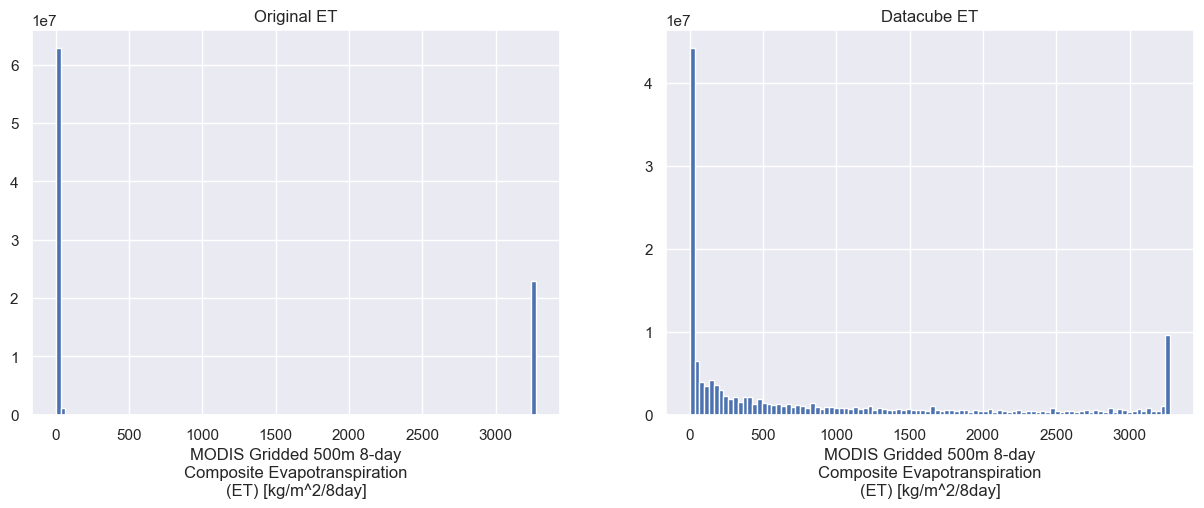

In [28]:
# Plot the ET distribution from the original dataset and the datacube
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
evap_filter.plot.hist(ax=ax[0], bins=100)
datacube['ET_500m'].plot.hist(ax=ax[1], bins=100)
ax[0].set_title('Original ET')
ax[1].set_title('Datacube ET')
plt.show()

In [26]:

# Statistics of the ET on the original dataset and the datacube
print('Original ET')
print(evap_filter.mean().values)
print(evap_filter.std().values)
print(evap_filter.min().values)
print(evap_filter.max().values)
print('-------------------')
print('Datacube ET')
print(datacube['ET_500m'].mean().values)
print(datacube['ET_500m'].std().values)
print(datacube['ET_500m'].min().values)
print(datacube['ET_500m'].max().values)

Original ET
873.40027
1271.927001953125
0.0
3276.60009765625
-------------------
Datacube ET
881.6208088699434
1091.2482446947556
1.2114257812501137
3276.60009765625
